In [1]:
using GynC
using JLD

cookie: Yy6q4zLqrMdaL8IB
VERSION: 0.5.0
worker_arg: `--worker Yy6q4zLqrMdaL8IB`


In [ ]:
ss=GynC.readsamples("/datanumerik/bzfsikor/gync/master")

# convergence diagnostics

In [12]:
using Mamba
c=Chains(ss[1].samples[:,:], thin=1000, start=1000)

Object of type "Mamba.Chains"

Iterations = 1000:500000000
Thinning interval = 1000
Chains = 1
Samples per chain = 500000

[7689.02 6741.49 … 2.65304e-5 28.814; 7689.02 6741.49 … 2.65304e-5 28.814; … ; 18351.4 21416.3 … 0.00011023 28.0803; 18351.4 21416.3 … 0.00011023 28.0803]

In [281]:
gds = [(    s = s.samples[100_001:end,:];
c1= Chains(s[1:200_000,:]);
c2= Chains(s[200_001:end,:]);
splitchain = cat(3,c1,c2);

gd = gelmandiag(splitchain);
find(gd.value[:,2] .< 1.2 ))
for s in ss]

53-element Array{Array{Int64,1},1}:
 [3,4,5,7,8,9,14,15,16,17  …  103,105,106,108,109,110,112,114,115,116]   
 [1,2,3,4,5,6,7,8,9,10  …  105,106,109,110,111,112,113,114,115,116]      
 [1,2,3,4,5,6,7,8,9,10  …  107,108,109,110,111,112,113,114,115,116]      
 [1,3,5,9,12,16,17,18,22,28  …  72,77,81,84,85,88,90,108,109,110]        
 [1,3,5,6,7,9,10,11,12,13  …  99,103,104,109,110,111,112,113,114,116]    
 [1,4,5,6,7,10,11,12,15,16  …  104,105,106,107,108,110,111,112,114,115]  
 [2,13,15,22,23,27,32,34,37,40  …  86,90,94,96,100,110,112,113,115,116]  
 [1,2,4,5,6,7,8,9,10,11  …  100,103,104,105,108,109,110,111,112,116]     
 [1,7,8,10,11,14,16,17,19,20  …  100,101,103,104,105,107,108,110,111,116]
 [2,3,4,7,10,16,17,22,23,24  …  105,106,108,109,110,111,112,113,115,116] 
 [1,2,3,4,6,7,8,9,12,13  …  104,106,107,108,109,111,113,114,115,116]     
 [1,6,7,9,11,12,16,17,18,19  …  99,100,101,102,103,106,108,110,111,115]  
 [1,3,4,5,6,7,8,9,10,11  …  103,104,106,109,110,111,112,114,115,116]     
 ⋮

In [284]:
map(length, gds) |> mean

74.16981132075472

In [285]:
@time gewekediag(Chains(s))

LoadError: InterruptException:

In [293]:
heideldiags = [begin 
    s=s.samples[100_001:end,:]
  h=heideldiag(Chains(s[1:10:end,:], thin=1000, start=100))
end
for s in ss]

53-element Array{Mamba.ChainSummary,1}:
            Burn-in  Stationarity p-value         Mean               Halfwidth       Test
  Param1 4.0990×10³            1  0.3449       2.20028381×10⁴        1.12199543×10³    1
  Param2 1.2099×10⁴            1  0.0864       1.89885941×10⁴        1.87049174×10³    1
  Param3 9.9000×10¹            1  0.8683       4.17446691×10²        3.46113329×10¹    1
  Param4 9.9000×10¹            1  0.7037       5.93006423×10⁰      4.737166758×10⁻¹    1
  Param5 9.9000×10¹            1  0.4499    1.9064137997×10⁻²   5.004949302086×10⁻⁴    1
  Param6 1.6099×10⁴            1  0.2925     4.435666743×10⁻¹     3.4426542918×10⁻²    1
  Param7 9.9000×10¹            1  0.1026   1.27557401475×10⁻³  2.4924652644092×10⁻⁵    1
  Param8 9.9000×10¹            1  0.1583       1.04497874×10¹      7.385990925×10⁻¹    1
  Param9 9.9000×10¹            1  0.5681       5.48739014×10⁰      3.418446663×10⁻¹    1
 Param10 1.6099×10⁴            1  0.0554       2.19466503×10²        

In [299]:
@show tmp=[sum(h.value[:,6].==1) for h in heideldiags]
mean(tmp)

tmp = [sum(h.value[:,6] .== 1) for h = heideldiags] = [91,96,113,83,90,81,77,92,100,98,90,105,93,99,97,109,105,83,104,111,92,100,89,50,105,87,97,98,103,112,96,106,93,99,105,101,106,89,101,84,98,107,98,95,87,102,100,61,85,84,100,95,87]


94.88679245283019

In [74]:
rafterydiag(Chains(s, thin=100, start=100))

         Thinning   Burn-in        Total     Nmin Dependence Factor
  Param1 6.90×10³ 1.17399×10⁵ 1.30893099×10⁸ 3746     3.4942098×10⁴
  Param2 1.00×10² 1.37199×10⁵ 1.49687099×10⁸ 3746    3.99591829×10⁴
  Param3 1.00×10² 1.48999×10⁵ 1.62202899×10⁸ 3746    4.33002934×10⁴
  Param4 1.00×10² 6.89990×10⁴  7.5106399×10⁷ 3746    2.00497595×10⁴
  Param5 6.70×10³ 2.07799×10⁵ 2.13006499×10⁸ 3746    5.68623863×10⁴
  Param6 1.00×10² 9.65990×10⁴ 1.06016199×10⁸ 3746    2.83011743×10⁴
  Param7 6.50×10³ 1.36599×10⁵ 1.49994099×10⁸ 3746    4.00411369×10⁴
  Param8 1.00×10² 1.03099×10⁵ 1.12135299×10⁸ 3746    2.99346767×10⁴
  Param9 1.00×10² 8.18990×10⁴  9.0460499×10⁷ 3746    2.41485582×10⁴
 Param10 8.10×10³ 2.67399×10⁵ 2.95366599×10⁸ 3746    7.88485315×10⁴
 Param11 1.00×10² 1.73399×10⁵ 1.90438799×10⁸ 3746    5.08379068×10⁴
 Param12 5.90×10³ 1.59399×10⁵ 1.72291899×10⁸ 3746    4.59935662×10⁴
 Param13 1.00×10² 1.24199×10⁵ 1.35317399×10⁸ 3746    3.61231711×10⁴
 Param14 2.60×10³ 1.66499×10⁵ 1.80161899×10⁸ 374

In [76]:
s[:,1] |> unique

23556-element Array{Float64,1}:
 13074.1
 11989.2
 13032.6
 13027.0
 13592.9
 13286.9
 13691.5
 13982.0
 14750.1
 15912.6
 15698.7
 15853.6
 16068.7
     ⋮  
 19089.8
 18721.6
 19501.8
 19933.4
 19726.0
 19152.6
 20025.8
 22809.4
 22818.8
 20617.2
 19069.1
 18351.4

In [83]:
all = vcat([s.samples for s in ss]...)
all[1:5000,:]

26500000×116 Array{Float64,2}:
  7689.02   6741.49  178.03   2.79588  …  3.06117e-5   2.65304e-5  28.814 
  7689.02   6741.49  178.03   2.79588     3.06117e-5   2.65304e-5  28.814 
  7699.74   6644.56  179.776  2.77725     3.00056e-5   2.52037e-5  28.7186
  7752.59   6873.43  182.967  2.85618     2.96218e-5   2.54397e-5  28.6576
  8034.95   7103.1   185.929  2.94203     2.90978e-5   2.7418e-5   28.5367
  8223.7    7075.63  189.722  2.85605  …  3.08952e-5   2.81012e-5  28.6282
  8253.32   7203.34  186.465  2.70351     3.15549e-5   2.81858e-5  28.612 
  8386.86   6833.09  184.735  2.68856     3.21237e-5   2.78143e-5  28.6209
  8356.07   7055.29  182.705  2.51581     3.09671e-5   2.82632e-5  28.7963
  8529.36   7127.67  177.769  2.50742     3.04765e-5   2.81383e-5  28.7648
  8561.24   6923.53  173.82   2.48789  …  3.09826e-5   2.8249e-5   28.7501
  8502.89   6761.33  179.223  2.45263     3.0733e-5    2.88671e-5  28.6344
  8442.1    6888.34  178.913  2.41734     3.05244e-5   2.93428e-5  28

In [300]:
using Plots
x = all[1:10000:end,:]

2650×116 Array{Float64,2}:
  7689.02   6741.49  178.03    2.79588  …  3.06117e-5   2.65304e-5   28.814 
 10069.1    5799.77  245.606   4.40865     0.000186322  9.54554e-5   26.9527
 12150.9   10163.1    94.0945  2.52414     0.000173343  0.000155266  26.8688
  8958.1   13026.8   140.922   3.08667     0.000269377  9.70445e-5   27.8059
  9142.05  26374.3   162.083   3.51749     0.000139399  7.88373e-5   27.8801
 14520.4   24814.9   438.81    5.59561  …  0.000193755  0.000173582  26.6981
  9437.01  24534.6   239.216   5.19359     0.000287392  0.000104353  28.4166
 10839.5   10964.4   381.381   6.23734     0.00023328   0.000124886  28.6908
  8618.38  26948.5   277.784   6.26735     0.000230757  0.000107428  28.0122
 24422.7   34196.8   421.258   4.4261      0.000131356  9.33919e-5   27.0097
 13074.1   32322.5   373.972   6.04575  …  0.000208934  0.000168545  28.0887
 14110.1   32350.2   423.366   9.69141     0.000121874  6.06444e-5   28.8827
 21247.7   30111.8   807.527   9.24102     0.0001


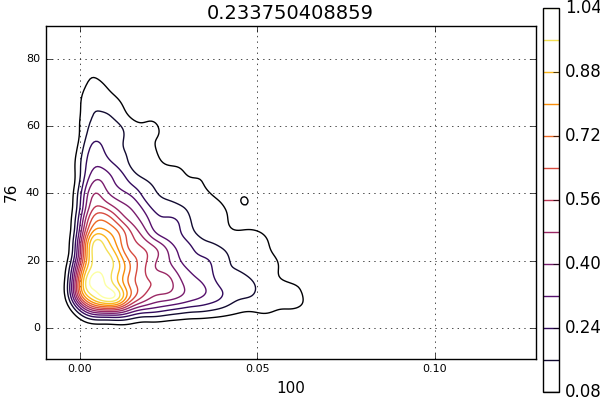


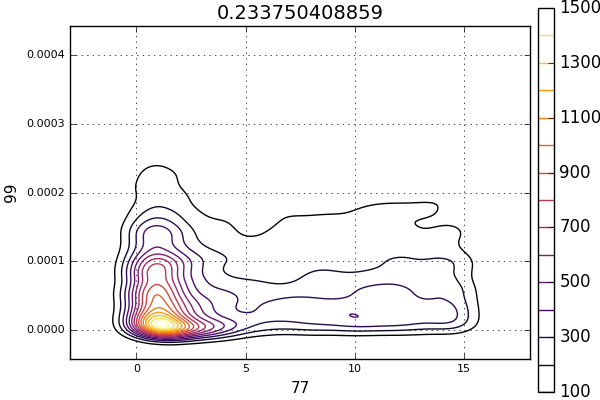

In [174]:
cor = cov(x ./ mean(x,1))
inds = sortperm(abs(vec(cor)), rev=true)

transformtoinds(i) = [i%116, floor(Int,i/116)]

for i  in inds[1:60]
  ii = transformtoinds(i)
  abs(ii[1] - ii[2]) < 2 && continue
  k=kde(x[:,ii])
  contour(k.x, k.y, k.density', xlabel=ii[1], ylabel=ii[2], title = cor[i]) |> display
end

In [301]:
m=GynC.gyncmodel([x[i,:] for i=1:size(x,1)], GynC.alldatas(), zmult = 20)
w0 = GynC.uniformweights(m.xs|>length)

2648-element Array{Float64,1}:
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 ⋮          
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644
 0.000377644

In [323]:
Profile.init(10^6, 0.01)
@profile wopt = optimmple(m, 0.9, w0) 

f: sum(x)=1.000000 f(x)=81.036078 outliers=0 


f: sum(x)=1.000000 f(x)=81.036078 outliers=0 
in callback catch


LoadError: InterruptException:

In [317]:
Profile.print()

1    ./event.jl:379; (::Base.##349#350{IJulia.#send_st...
 1 ./event.jl:319; wait(::Timer)
  1 ./event.jl:27; wait(::Condition)
   1 ./event.jl:0; wait()
7411 ./task.jl:360; (::IJulia.##13#19)()
 7411 ...Julia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  7411 ...rc/execute_request.jl:157; execute_request(::ZMQ.Socket, ::...
   7411 ./loading.jl:441; include_string(::String, ::String)
    7411 ./<missing>:?; anonymous
     7411 ./profile.jl:16; macro expansion;
      7411 .../gc/src/eb/optim.jl:99; #optimmple#183(::Symbol, ::Int...
       7411 ./show.jl:218; macro expansion
        7411 ...NLopt/src/NLopt.jl:526; optimize!(::NLopt.Opt, ::Arr...
         7411 ...NLopt/src/NLopt.jl:427; nlopt_callback_wrapper(::UI...
          295  ...gc/src/eb/optim.jl:46; (::#myf#184{Int64,GynC.##88...
           295 ...likelihoodmodel.jl:37; (::GynC.##88#91{GynC.Likeli...
            2   ...ikelihoodmodel.jl:57; logl
             2 ...eb/regularizers.jl:3; logl
              2 ...ze/src/Memoize.jl:103

In [ ]:
wopt2 = GynC.optimmple(m, 0.99, w0) 

In [ ]:
Plots.plot()
for w in [w0, wopt, wopt2]
  k = kde(map(x->x[8], m.xs), weights=w)
  Plots.plot!(k.x|>collect, k.density)
  @show sumabs2(w)
end
Plots.plot!()

In [216]:
sum(wopt.>0.001)

102

In [264]:
JLD.save("master.jld", "samples", x, "w90", wopt, "w99", wopt2, "model", m)

In [ ]:
include("../scripts/gyncplots.jl");

In [ ]:
n = length(m.xs)
ms = GynC.smoothedmodel(m, 30)
muni = gyncmodel(vcat(samplepi0(n, trajts), m.xs), m.datas, zmult=0)

In [ ]:
ws = Dict{String, Vector{Vector{Float64}}}()

In [ ]:
@time ws["uni"] = [inverseweights(muni.xs)]

In [ ]:
ws["MPLE"] = [wopt2]

In [ ]:
niter = 1000
@time ws["NPMLE"] = [GynC.em(m, w0, niter)[end]]
@time ws["DS-MLE"] = [GynC.em(ms, w0, niter)[end]]

In [290]:
wsold = ws

Dict{String,Array{Array{Float64,1},1}} with 4 entries:
  "MPLE"   => Array{Float64,1}[[0.000509652,1.6892e-6,2.05072e-5,2.14329e-6,5.2…
  "NPMLE"  => Array{Float64,1}[[0.0,9.69357e-321,1.07221e-215,1.25334e-231,4.02…
  "uni"    => Array{Float64,1}[[0.000580807,0.000575239,0.000483324,0.000529632…
  "DS-MLE" => Array{Float64,1}[[0.0,8.50054e-123,8.01162e-103,3.45876e-109,3.22…

In [ ]:
paperplot(m, muni, ws)

In [275]:
m.datas

53-element Array{Any,1}:
 [NaN NaN NaN NaN; NaN NaN NaN NaN; … ; NaN NaN NaN NaN; NaN 1.56 NaN NaN]               
 [NaN NaN NaN NaN; NaN NaN NaN NaN; … ; 4.31 2.92 130.21 8.91; NaN NaN NaN NaN]          
 [NaN NaN NaN NaN; NaN NaN NaN NaN; … ; NaN NaN NaN NaN; 4.19 4.0 57.4775 2.89]          
 [NaN NaN NaN NaN; NaN NaN NaN NaN; … ; NaN 2.34 NaN NaN; NaN NaN NaN NaN]               
 [NaN NaN NaN NaN; 5.75 6.1 20.8935 0.977; … ; NaN NaN NaN NaN; NaN 3.74 NaN NaN]        
 [NaN NaN NaN NaN; NaN NaN NaN NaN; … ; 14.1 3.92 103.514 0.7; NaN NaN NaN NaN]          
 [19.5 NaN NaN NaN; NaN NaN NaN NaN; … ; 8.11 NaN 123.672 8.77; NaN NaN NaN NaN]         
 [NaN NaN NaN NaN; NaN NaN NaN NaN; … ; 8.54 3.45 61.5636 2.38; NaN NaN NaN NaN]         
 [NaN NaN NaN NaN; NaN NaN NaN NaN; … ; 4.6 4.44 39.7712 0.62; NaN NaN NaN NaN]          
 [NaN NaN NaN NaN; NaN NaN NaN NaN; … ; NaN NaN NaN NaN; NaN 1.96 NaN NaN]               
 [7.11 3.45 32.0076 1.44; NaN NaN NaN NaN; … ; NaN NaN NaN NaN; NaN 1.85 Na